In [1]:
import json
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Read the given JSON file
with open('KC.json', 'r') as file:
    data = json.load(file)

# Print the data
print(data)

[{'Recipient': 'B', 'Donor': ['AB']}, {'Recipient': 'A', 'Donor': ['AB', 'B']}, {'Recipient': 'B', 'Donor': ['AB', 'A']}, {'Recipient': 'B', 'Donor': ['AB', 'A']}, {'Recipient': 'O', 'Donor': ['AB', 'B']}, {'Recipient': 'B', 'Donor': ['AB', 'A']}, {'Recipient': 'A', 'Donor': ['AB', 'B']}, {'Recipient': 'A', 'Donor': ['AB']}, {'Recipient': 'B', 'Donor': ['A']}, {'Recipient': 'A', 'Donor': ['AB', 'B']}, {'Recipient': 'B', 'Donor': ['A']}, {'Recipient': 'A', 'Donor': ['B']}, {'Recipient': 'O', 'Donor': ['AB', 'A']}, {'Recipient': 'B', 'Donor': ['AB', 'A']}, {'Recipient': 'B', 'Donor': ['AB', 'A']}, {'Recipient': 'A', 'Donor': ['B']}, {'Recipient': 'A', 'Donor': ['AB', 'B']}, {'Recipient': 'B', 'Donor': ['AB', 'A']}, {'Recipient': 'B', 'Donor': ['AB', 'A']}, {'Recipient': 'O', 'Donor': ['AB', 'B']}, {'Recipient': 'A', 'Donor': ['B']}, {'Recipient': 'O', 'Donor': ['AB', 'B', 'A']}, {'Recipient': 'O', 'Donor': ['AB', 'A', 'B']}, {'Recipient': 'B', 'Donor': ['AB']}, {'Recipient': 'O', 'Donor'

In [3]:
import networkx as nx

# Initialize a directed graph
G = nx.DiGraph()

# Add nodes with attributes from the dataset
for index, element in enumerate(data):
    G.add_node(index, **element) 
# Define donor-to-recipient compatibility accordingly
donor_recipient_compatibility = {
    'O': ['O', 'A', 'B', 'AB'],
    'A': ['A', 'AB'],
    'B': ['B', 'AB'],
    'AB': ['AB']
}

# Adding the edges based on donor-recipient compatibility
for donor_node, donor_attrs in G.nodes(data=True):
    donors = donor_attrs['Donor']  #The blood types of the donors associated with the current node
    
    for recipient_node, recipient_attrs in G.nodes(data=True):
        if donor_node == recipient_node:
            continue  # Skip self-loops
        
        recipient = recipient_attrs['Recipient']  # Recipient blood type of the other node
        
        # Check if any donor in the current node matches the recipient
        if any(recipient in donor_recipient_compatibility[donor] for donor in donors):
            G.add_edge(donor_node, recipient_node)

# Now display edges of the graph
print('Edges:', list(G.edges))


Edges: [(1, 0), (1, 2), (1, 3), (1, 5), (1, 8), (1, 10), (1, 13), (1, 14), (1, 17), (1, 18), (1, 23), (1, 25), (1, 28), (1, 29), (1, 37), (1, 41), (1, 45), (1, 54), (1, 55), (1, 56), (1, 59), (1, 61), (1, 63), (1, 67), (1, 71), (1, 75), (1, 76), (1, 77), (1, 80), (1, 84), (1, 89), (1, 90), (1, 91), (1, 92), (1, 93), (1, 95), (1, 96), (1, 97), (1, 99), (1, 100), (1, 103), (1, 105), (1, 106), (1, 107), (1, 108), (1, 109), (1, 115), (1, 122), (1, 129), (1, 133), (1, 138), (1, 140), (1, 142), (1, 145), (1, 148), (1, 149), (1, 150), (1, 152), (1, 153), (1, 157), (1, 158), (1, 167), (1, 168), (1, 172), (1, 178), (1, 183), (1, 185), (1, 189), (1, 193), (1, 197), (1, 198), (1, 200), (1, 202), (1, 204), (1, 210), (1, 216), (1, 217), (1, 219), (1, 232), (1, 235), (1, 237), (1, 238), (1, 239), (1, 240), (1, 241), (1, 247), (1, 250), (1, 252), (1, 257), (1, 258), (1, 260), (1, 264), (1, 266), (1, 267), (1, 275), (1, 277), (1, 279), (1, 283), (1, 285), (1, 286), (1, 287), (1, 288), (1, 289), (1, 29

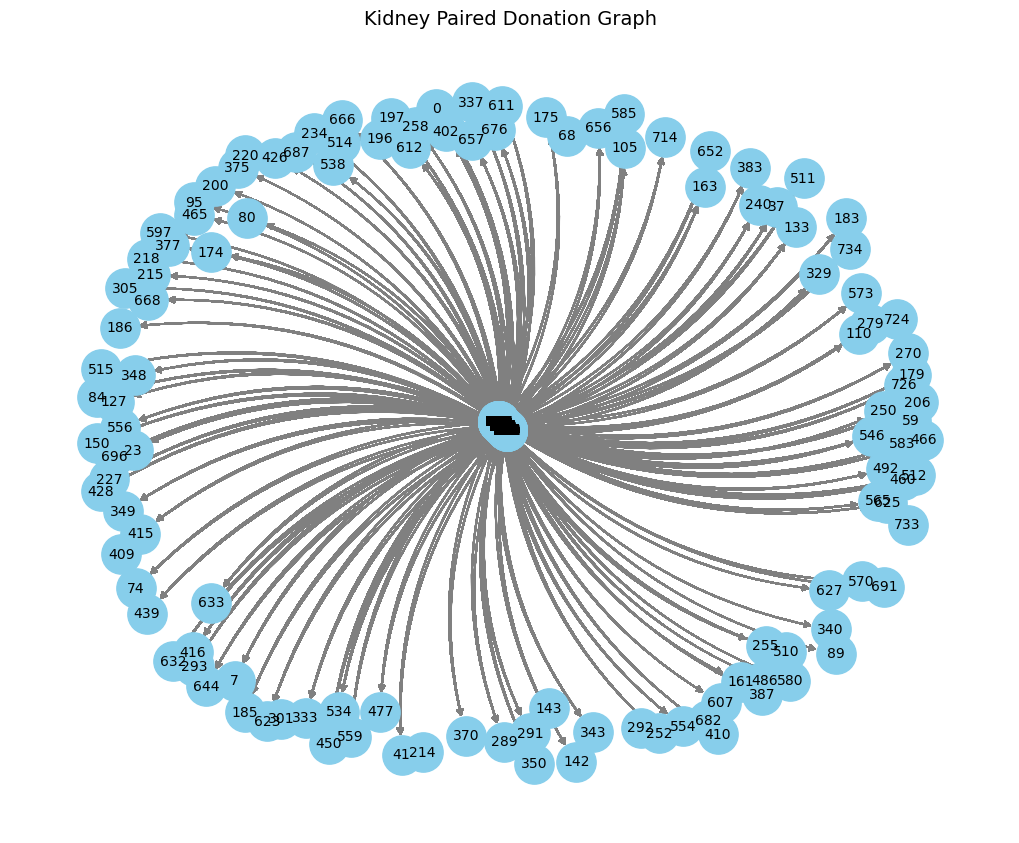

In [4]:
import matplotlib.pyplot as plt

# Generate a layout for better visualization
pos = nx.spring_layout(G, seed=42)  # Use spring layout for a more natural distribution of nodes

# Draw the graph
plt.figure(figsize=(10, 8))  
nx.draw(
    G, 
    pos, 
    with_labels=True, 
    node_size=800, 
    node_color='skyblue', 
    font_size=10, 
    font_color='black', 
    edge_color='gray', 
    connectionstyle="arc3,rad=0.2"  
)

# Add a title to the graph
plt.title("Kidney Paired Donation Graph", fontsize=14)

# Show the graph
plt.show()


In [5]:
# Convert directed graph G to undirected for potential neighbor checks
H = G.to_undirected()

# Find potential cycles of length 3 (u, v, k)
potential_cycle_3 = []

for (u, v) in H.edges:
    # Find common neighbors of u and v
    for k in nx.common_neighbors(H, u, v):
        potential_cycle_3.append((u, v, k))

# Filter the potential cycles to find valid cycles of size 3 in the directed graph
cycle_3 = []

for (u, v, k) in potential_cycle_3:
    # Check all directed edges to confirm the cycle
    if (u, v) in G.edges and (v, k) in G.edges and (k, u) in G.edges:
        cycle_3.append((u, v, k, u))  
    elif (v, u) in G.edges and (u, k) in G.edges and (k, v) in G.edges:
        cycle_3.append((v, u, k, v))  

# Display the cycles
print(f"Found {len(cycle_3)} cycles of size 3.")
for cycle in cycle_3:  
    print(cycle)


Found 0 cycles of size 3.


In [6]:
# Find cycles of length 2

cycle_2 = []

# Initialize the 'visited' attribute for all edges
for (i, j) in G.edges:
    G.edges[(i, j)]["visited"] = False

# Iterate through edges to find 2-cycles
for (i, j) in G.edges:
    # Skip if the edge is already marked as visited
    if G.edges[(i, j)]["visited"]:
        continue
    
    # Check if the reverse edge (j, i) exists in the graph
    if (j, i) in G.edges:
        # Add the 2-cycle (i, j, i) to the list
        cycle_2.append((i, j, i))
        
        # Mark both edges (i, j) and (j, i) as visited
        G.edges[(i, j)]["visited"] = True
        G.edges[(j, i)]["visited"] = True

# Count the number of 2-cycles
cycle_2_count = len(cycle_2)

# Print the results
print("Cycles of length 2:", cycle_2)
print(f"Number of cycles of length 2: {cycle_2_count}")


Cycles of length 2: [(1, 2, 1), (1, 3, 1), (1, 5, 1), (1, 8, 1), (1, 10, 1), (1, 13, 1), (1, 14, 1), (1, 17, 1), (1, 18, 1), (1, 25, 1), (1, 28, 1), (1, 29, 1), (1, 45, 1), (1, 54, 1), (1, 55, 1), (1, 56, 1), (1, 61, 1), (1, 63, 1), (1, 67, 1), (1, 71, 1), (1, 75, 1), (1, 76, 1), (1, 77, 1), (1, 90, 1), (1, 91, 1), (1, 92, 1), (1, 93, 1), (1, 96, 1), (1, 97, 1), (1, 99, 1), (1, 100, 1), (1, 103, 1), (1, 106, 1), (1, 107, 1), (1, 108, 1), (1, 109, 1), (1, 115, 1), (1, 122, 1), (1, 129, 1), (1, 138, 1), (1, 140, 1), (1, 145, 1), (1, 148, 1), (1, 149, 1), (1, 152, 1), (1, 153, 1), (1, 157, 1), (1, 158, 1), (1, 167, 1), (1, 168, 1), (1, 172, 1), (1, 178, 1), (1, 189, 1), (1, 193, 1), (1, 198, 1), (1, 202, 1), (1, 204, 1), (1, 210, 1), (1, 216, 1), (1, 217, 1), (1, 219, 1), (1, 232, 1), (1, 235, 1), (1, 237, 1), (1, 238, 1), (1, 239, 1), (1, 241, 1), (1, 247, 1), (1, 257, 1), (1, 260, 1), (1, 264, 1), (1, 266, 1), (1, 267, 1), (1, 275, 1), (1, 277, 1), (1, 283, 1), (1, 285, 1), (1, 286, 1),

In [7]:
import gurobipy as gp
from gurobipy import GRB

# Create model
model = gp.Model("KPD_Maximization")

# Add binary decision variables for each edge
x = model.addVars(G.edges, vtype=GRB.BINARY, name="x")

# Objective: Maximize the number of selected edges (transplants)
model.setObjective(gp.quicksum(x[edge] for edge in G.edges), GRB.MAXIMIZE)

# Constraint: Each donor-recipient pair can participate in at most one cycle
model.addConstrs(
    gp.quicksum(x[u, v] for u, v in G.edges if u == node or v == node) <= 1
    for node in G.nodes
)

# Optimize the model
model.optimize()

# Retrieve and print the edges in the optimal solution
if model.status == GRB.OPTIMAL:
    selected_edges = [edge for edge in G.edges if x[edge].x > 0.5]
    print(f"Optimal Matching Edges: {selected_edges}")
    print(f"Number of transplants: {len(selected_edges)}")
else:
    print("No optimal solution found.")


Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-13
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (mac64[arm])

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 740 rows, 187106 columns and 374212 nonzeros
Model fingerprint: 0x22f9dae3
Variable types: 0 continuous, 187106 integer (187106 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 364.0000000
Presolve removed 12 rows and 36337 columns
Presolve time: 0.29s
Presolved: 728 rows, 150769 columns, 301538 nonzeros
Found heuristic solution: objective 364.0000000
Variable types: 0 continuous, 150769 integer (150769 binary)

Starting sifting (using dual simplex for sub-problems)...

    Iter     Pivots    Primal Obj      Dual Obj        Time
       0          0     infinity     

In [8]:
# Print the objective value
print(f"Objective Value: {model.ObjVal}")

# Retrieve and print the selected edges
selected_edges = [edge for edge, var in x.items() if var.X > 0.5]
print(f"Selected Edges: {selected_edges}")


Objective Value: 364.0
Selected Edges: [(1, 0), (2, 27), (3, 7), (4, 5), (6, 10), (8, 9), (11, 17), (12, 15), (13, 16), (14, 20), (18, 30), (19, 23), (21, 25), (22, 28), (24, 29), (26, 37), (31, 32), (33, 34), (35, 41), (36, 106), (38, 45), (39, 40), (42, 46), (43, 47), (44, 48), (49, 55), (50, 56), (51, 57), (52, 59), (53, 60), (54, 94), (58, 61), (62, 63), (64, 91), (65, 71), (66, 75), (67, 130), (69, 74), (70, 76), (72, 77), (73, 79), (78, 80), (81, 84), (82, 89), (83, 85), (86, 88), (87, 90), (92, 110), (93, 116), (96, 118), (97, 120), (98, 123), (99, 124), (100, 127), (101, 95), (102, 103), (104, 105), (107, 131), (108, 159), (109, 136), (111, 115), (112, 122), (113, 129), (114, 133), (117, 138), (119, 140), (121, 142), (125, 141), (126, 145), (128, 148), (132, 167), (134, 146), (135, 149), (137, 150), (139, 151), (144, 152), (147, 156), (153, 160), (154, 157), (155, 158), (162, 168), (164, 204), (165, 178), (166, 183), (169, 185), (170, 161), (171, 163), (172, 191), (173, 232), (

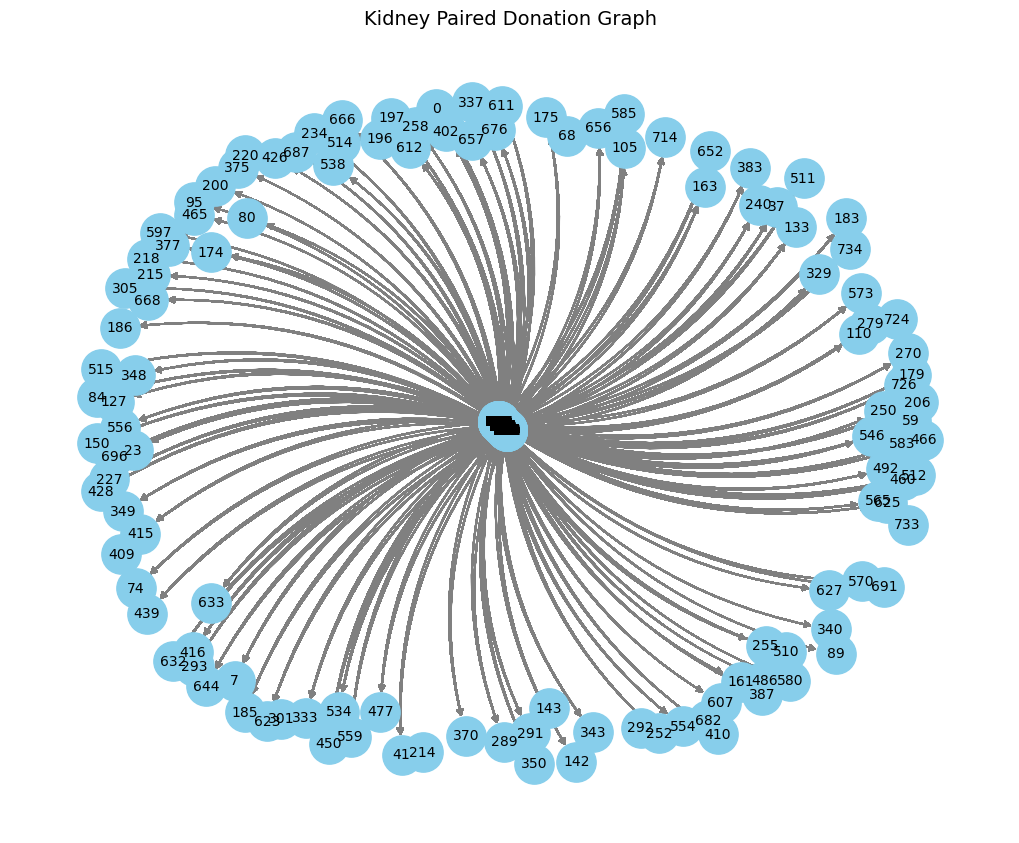

In [9]:
import matplotlib.pyplot as plt

# Generate a layout for better visualization
pos = nx.spring_layout(G,seed=42)  

# Draw the graph
plt.figure(figsize=(10, 8))
nx.draw(
    G, 
    pos, 
    with_labels=True, 
    node_size=800, 
    node_color='skyblue', 
    font_size=10, 
    font_color='black', 
    edge_color='gray', 
    connectionstyle="arc3,rad=0.2" 
)

# Add a title to the graph
plt.title("Kidney Paired Donation Graph", fontsize=14)

# Show the graph
plt.show()

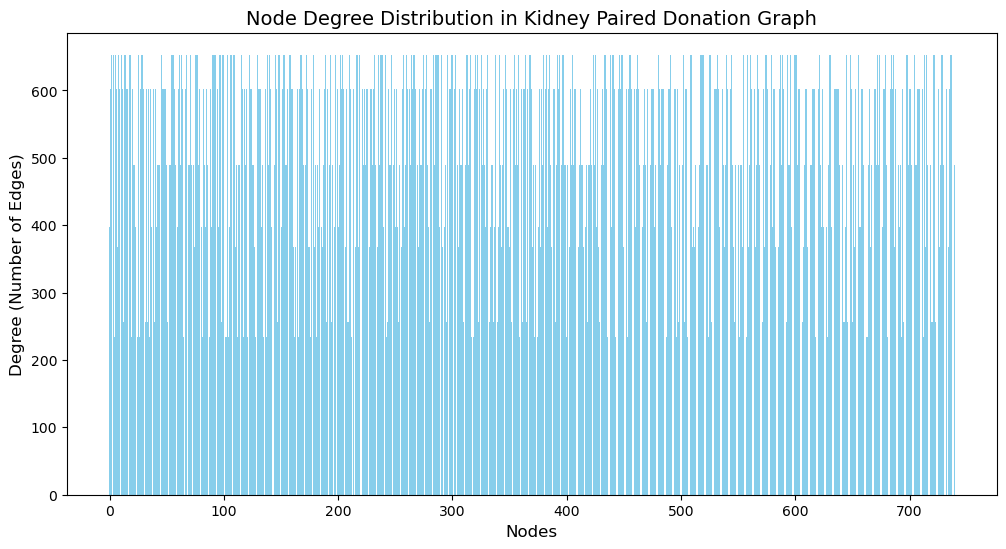

In [10]:
import matplotlib.pyplot as plt
import networkx as nx

# Compute the degree of each node
degrees = dict(nx.degree(G))

# Prepare data for the bar graph
nodes = list(degrees.keys())
degree_values = list(degrees.values())

# Plot the bar graph
plt.figure(figsize=(12, 6))
plt.bar(nodes, degree_values, color='skyblue')

# Add labels and title
plt.xlabel("Nodes", fontsize=12)
plt.ylabel("Degree (Number of Edges)", fontsize=12)
plt.title("Node Degree Distribution in Kidney Paired Donation Graph", fontsize=14)

# Show the bar graph
plt.show()


Bar Graph:

1.Represents the degree of each node in the graph.
2.Nodes are shown on the x-axis, and the number of edges (degree) is on the y-axis.
3.Useful for understanding the connectivity of individual nodes.

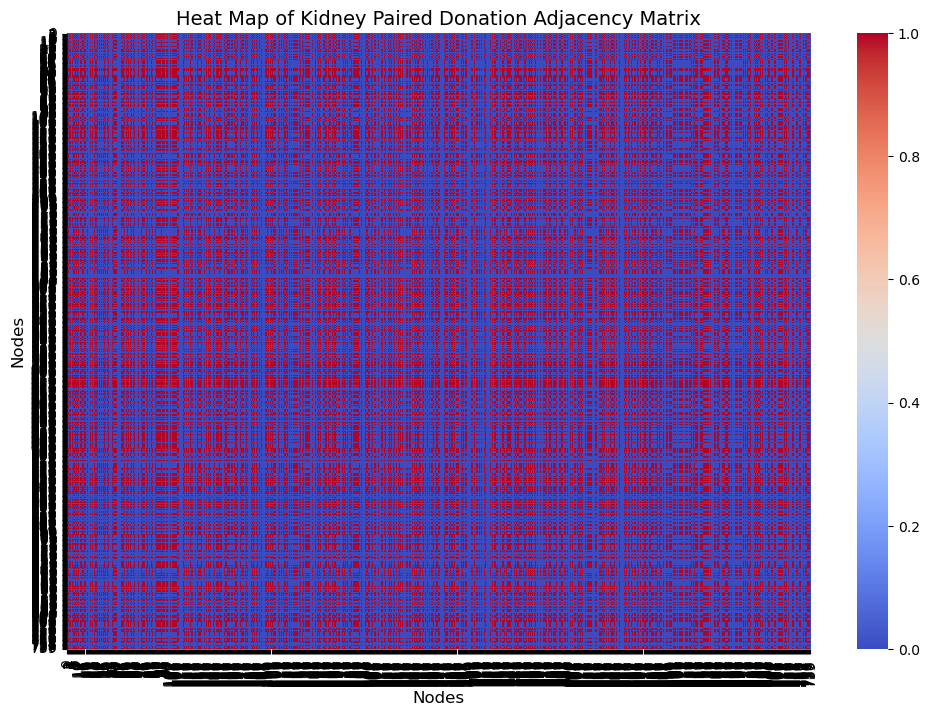

In [11]:
import numpy as np
import seaborn as sns

# Create the adjacency matrix
adj_matrix = nx.adjacency_matrix(G).todense()

# Create a heat map using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(
    adj_matrix, 
    cmap="coolwarm", 
    xticklabels=True, 
    yticklabels=True, 
    cbar=True
)

# Add labels and title
plt.title("Heat Map of Kidney Paired Donation Adjacency Matrix", fontsize=14)
plt.xlabel("Nodes", fontsize=12)
plt.ylabel("Nodes", fontsize=12)

# Show the heat map
plt.show()


Heat Map:

1.Represents the adjacency matrix of the graph.
2.Each cell in the heat map indicates the presence (1) or absence (0) of an edge between two nodes.
3.Provides a global view of the connectivity in the network.

In [12]:
# Total nodes and edges before optimization
total_nodes = len(G.nodes)
total_edges = len(G.edges)

# After optimization: Extract selected edges
if model.status == GRB.OPTIMAL:
    selected_edges = [edge for edge in G.edges if x[edge].x > 0.5]
    selected_nodes = set(node for edge in selected_edges for node in edge)  # Unique nodes in selected edges

    # Calculate the number of selected nodes and edges
    num_selected_nodes = len(selected_nodes)
    num_selected_edges = len(selected_edges)

    # Calculate percentages
    node_percentage = (num_selected_nodes / total_nodes) * 100
    edge_percentage = (num_selected_edges / total_edges) * 100

    # Print results
    print(f"Total Nodes Before Optimization: {total_nodes}")
    print(f"Total Edges Before Optimization: {total_edges}")
    print(f"Selected Nodes After Optimization: {num_selected_nodes} ({node_percentage:.2f}%)")
    print(f"Selected Edges After Optimization: {num_selected_edges} ({edge_percentage:.2f}%)")
else:
    print("No optimal solution found.")


Total Nodes Before Optimization: 740
Total Edges Before Optimization: 187106
Selected Nodes After Optimization: 728 (98.38%)
Selected Edges After Optimization: 364 (0.19%)


In [13]:
# Assume `selected_edges` contains the selected edges from the optimization
# Assume `cycles` is a precomputed list of all valid cycles (2-cycles and 3-cycles)

# Initialize a dictionary to count transplants based on cycle type
transplant_counts = {"1-way": 0, "2-way": 0, "3-way": 0}

# Analyze selected edges (assumed to represent cycles)
for cycle in selected_edges:
    cycle_length = len(cycle)
    if cycle_length == 1:
        transplant_counts["1-way"] += 1  # Single pair (1-way)
    elif cycle_length == 2:
        transplant_counts["2-way"] += 2  # Two pairs (2-way)
    elif cycle_length == 3:
        transplant_counts["3-way"] += 3  # Three pairs (3-way)

# Calculate total transplants
total_transplants = sum(transplant_counts.values())

# Check to avoid division by zero
if total_transplants > 0:
    # Calculate percentages for each transplant type
    transplant_percentages = {
        key: (count / total_transplants) * 100 for key, count in transplant_counts.items()
    }
else:
    transplant_percentages = {key: 0.0 for key in transplant_counts}

# Print results
print("Transplant Counts:", transplant_counts)
print("Transplant Percentages:")
for key, percentage in transplant_percentages.items():
    print(f"{key}: {percentage:.2f}%")


Transplant Counts: {'1-way': 0, '2-way': 728, '3-way': 0}
Transplant Percentages:
1-way: 0.00%
2-way: 100.00%
3-way: 0.00%


In [14]:

from collections import Counter

# Initialize counts for each node
node_transplant_counts = Counter()

# Analyze selected edges and count node involvement
for cycle in selected_edges:
    for node in cycle:
        node_transplant_counts[node] += 1  # Each node's involvement in a cycle is counted

# Calculate total transplants (sum of all cycle lengths)
total_transplants = sum(len(cycle) for cycle in selected_edges)

# Calculate percentage contribution for each node
node_percentages = {
    node: (count / total_transplants) * 100 for node, count in node_transplant_counts.items()
}

# Print results
print("Node Transplant Counts:")
for node, count in node_transplant_counts.items():
    print(f"{node}: {count} transplants")

print("\nNode Transplant Percentages:")
for node, percentage in node_percentages.items():
    print(f"{node}: {percentage:.2f}%")

# Transplant breakdown (1-way, 2-way, 3-way counts)
transplant_counts = {"1-way": 0, "2-way": 0, "3-way": 0}

# Analyze cycle types
for cycle in selected_edges:
    if len(cycle) == 1:
        transplant_counts["1-way"] += 1
    elif len(cycle) == 2:
        transplant_counts["2-way"] += 2  # Each pair contributes to the total transplants
    elif len(cycle) == 3:
        transplant_counts["3-way"] += 3  # Each pair contributes to the total transplants

# Print transplant breakdown
print("\nTransplant Counts:", transplant_counts)


Node Transplant Counts:
1: 1 transplants
0: 1 transplants
2: 1 transplants
27: 1 transplants
3: 1 transplants
7: 1 transplants
4: 1 transplants
5: 1 transplants
6: 1 transplants
10: 1 transplants
8: 1 transplants
9: 1 transplants
11: 1 transplants
17: 1 transplants
12: 1 transplants
15: 1 transplants
13: 1 transplants
16: 1 transplants
14: 1 transplants
20: 1 transplants
18: 1 transplants
30: 1 transplants
19: 1 transplants
23: 1 transplants
21: 1 transplants
25: 1 transplants
22: 1 transplants
28: 1 transplants
24: 1 transplants
29: 1 transplants
26: 1 transplants
37: 1 transplants
31: 1 transplants
32: 1 transplants
33: 1 transplants
34: 1 transplants
35: 1 transplants
41: 1 transplants
36: 1 transplants
106: 1 transplants
38: 1 transplants
45: 1 transplants
39: 1 transplants
40: 1 transplants
42: 1 transplants
46: 1 transplants
43: 1 transplants
47: 1 transplants
44: 1 transplants
48: 1 transplants
49: 1 transplants
55: 1 transplants
50: 1 transplants
56: 1 transplants
51: 1 transpl

In [15]:
# Assume `selected_edges` contains the selected edges from the optimization

# Get the total number of nodes and edges in the original graph
total_nodes = len(G.nodes)
total_edges = len(G.edges)

# Get the number of unique nodes involved in the selected edges
nodes_in_selected_edges = set()
for u, v in selected_edges:
    nodes_in_selected_edges.add(u)
    nodes_in_selected_edges.add(v)

# Calculate Node Participation Ratio
num_nodes_in_selected_edges = len(nodes_in_selected_edges)
node_participation_ratio = num_nodes_in_selected_edges / total_nodes

# Calculate Edge Utilization Ratio
num_selected_edges = len(selected_edges)
edge_utilization_ratio = num_selected_edges / total_edges

# Print results
print(f"Total number of nodes: {total_nodes}")
print(f"Number of nodes involved in selected edges: {num_nodes_in_selected_edges}")
print(f"Node Participation Ratio: {node_participation_ratio:.2%}")

print(f"Total number of edges: {total_edges}")
print(f"Number of selected edges: {num_selected_edges}")
print(f"Edge Utilization Ratio: {edge_utilization_ratio:.2%}")


Total number of nodes: 740
Number of nodes involved in selected edges: 728
Node Participation Ratio: 98.38%
Total number of edges: 187106
Number of selected edges: 364
Edge Utilization Ratio: 0.19%


In [16]:
# After the optimization
if model.status == GRB.OPTIMAL:
    # Retrieve the selected edges
    selected_edges = [edge for edge in G.edges if x[edge].x > 0.5]
    
    # Extract the nodes involved in the selected edges
    selected_nodes = set(node for edge in selected_edges for node in edge)
    
    # Calculate the percentage for the first 50 nodes
    total_nodes = len(G.nodes)  # Total nodes in the graph
    first_50_nodes = set(list(G.nodes)[:50])  # First 50 nodes
    involved_first_50 = selected_nodes.intersection(first_50_nodes)  # Nodes in the first 50 that are involved
    
    # Percentage calculation
    percentage_first_50 = (len(involved_first_50) / len(first_50_nodes)) * 100
    
    print(f"Optimal Matching Edges: {selected_edges}")
    print(f"Number of Transplants: {len(selected_edges)}")
    print(f"Percentage of First 50 Nodes Involved: {percentage_first_50:.2f}%")
else:
    print("No optimal solution found.")


Optimal Matching Edges: [(1, 0), (2, 27), (3, 7), (4, 5), (6, 10), (8, 9), (11, 17), (12, 15), (13, 16), (14, 20), (18, 30), (19, 23), (21, 25), (22, 28), (24, 29), (26, 37), (31, 32), (33, 34), (35, 41), (36, 106), (38, 45), (39, 40), (42, 46), (43, 47), (44, 48), (49, 55), (50, 56), (51, 57), (52, 59), (53, 60), (54, 94), (58, 61), (62, 63), (64, 91), (65, 71), (66, 75), (67, 130), (69, 74), (70, 76), (72, 77), (73, 79), (78, 80), (81, 84), (82, 89), (83, 85), (86, 88), (87, 90), (92, 110), (93, 116), (96, 118), (97, 120), (98, 123), (99, 124), (100, 127), (101, 95), (102, 103), (104, 105), (107, 131), (108, 159), (109, 136), (111, 115), (112, 122), (113, 129), (114, 133), (117, 138), (119, 140), (121, 142), (125, 141), (126, 145), (128, 148), (132, 167), (134, 146), (135, 149), (137, 150), (139, 151), (144, 152), (147, 156), (153, 160), (154, 157), (155, 158), (162, 168), (164, 204), (165, 178), (166, 183), (169, 185), (170, 161), (171, 163), (172, 191), (173, 232), (176, 193), (177